In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets, svm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, precision_recall_curve, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, SVR
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.utils import class_weight
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.datasets import make_classification


In [9]:
# 1.	Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy


# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
# We use a test_size of 0.2 (20% for testing) and a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an SVM Classifier instance
# We use a linear kernel for simplicity; other kernels like 'rbf' or 'poly' can also be used
svm_classifier = SVC(kernel='linear')

# Train the SVM Classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the SVM Classifier on the Iris dataset: {accuracy:.2f}")


Accuracy of the SVM Classifier on the Iris dataset: 1.00


In [10]:
# 2.	Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies


# Load the wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Train an SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Make predictions and calculate accuracy for the linear kernel SVM
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.4f}")

# Train an SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Make predictions and calculate accuracy for the RBF kernel SVM
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.4f}")

# Compare the accuracies
if accuracy_linear > accuracy_rbf:
    print("\nLinear kernel SVM performed better.")
elif accuracy_rbf > accuracy_linear:
    print("\nRBF kernel SVM performed better.")
else:
    print("\nBoth linear and RBF kernel SVMs performed equally.")




Accuracy of SVM with Linear Kernel: 0.9556
Accuracy of SVM with RBF Kernel: 0.6444

Linear kernel SVM performed better.


In [15]:
# 3.	Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the features for better SVR performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
# You can experiment with different kernels ('linear', 'poly', 'rbf', 'sigmoid')
# and hyperparameters like C, epsilon, and gamma.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# You can also print some predicted vs actual values for a quick check
print("\nSample Predictions vs Actual Values:")
for i in range(5):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}")

Mean Squared Error (MSE): 0.3260

Sample Predictions vs Actual Values:
Actual: 3.55, Predicted: 2.85
Actual: 0.71, Predicted: 0.60
Actual: 2.29, Predicted: 2.28
Actual: 1.12, Predicted: 1.48
Actual: 2.25, Predicted: 3.03


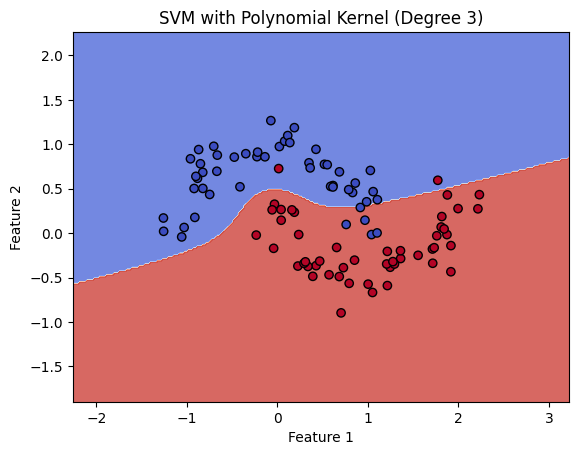

In [11]:
# 4.	Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

def plot_decision_boundary(model, X, y, title="SVM Decision Boundary"):

    #Plots the decision boundary of a trained SVM model.

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 1. Load or create a dataset
# We'll use the make_moons dataset as it's non-linearly separable
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=1)

# 2. Train the SVM Classifier with a Polynomial Kernel
# 'kernel='poly'' specifies a polynomial kernel
# 'degree' controls the degree of the polynomial
# 'C' is the regularization parameter
svm_clf = SVC(kernel='poly', degree=3, C=1.0, random_state=1)
svm_clf.fit(X, y)

# 3. Visualize the decision boundary
plot_decision_boundary(svm_clf, X, y, title="SVM with Polynomial Kernel (Degree 3)")


In [23]:
# 5.    Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy


data = sklearn.datasets.load_breast_cancer()
# Convert to pandas DataFrame to use .head()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#display(X_train.head())

# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes on Breast Cancer dataset: {accuracy:.4f}")

Accuracy of Gaussian Naive Bayes on Breast Cancer dataset: 0.9474


In [36]:
# 6.    Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the 20 Newsgroups dataset
# We'll load a subset of the categories for simplicity
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)


# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target


# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred = mnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naive Bayes on 20 Newsgroups dataset: {accuracy:.4f}")

# You can also print a classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

Accuracy of Multinomial Naive Bayes on 20 Newsgroups dataset: 0.8349

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



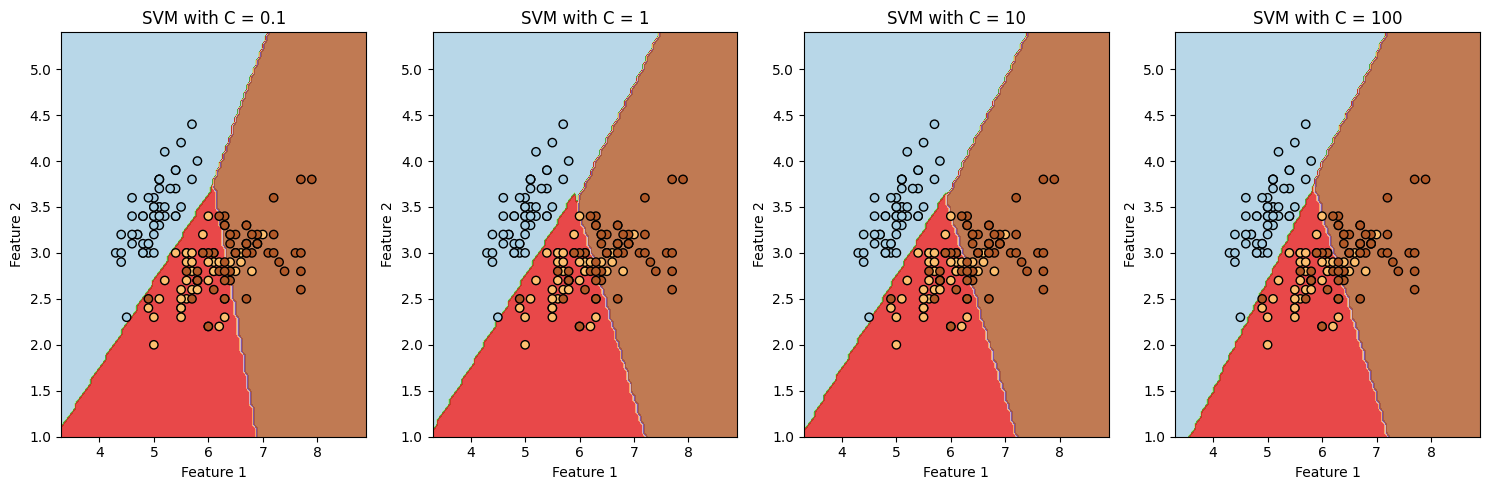

In [40]:
# 7.	Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

# Load a sample dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take only the first two features for visualization
y = iris.target

# Define different C values to test
C_values = [0.1, 1, 10, 100]

# Create a figure and subplots for visualization
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 5))

# Iterate through different C values
for i, C in enumerate(C_values):
    # Train an SVM classifier with the current C value
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)

    # Plot the decision boundary
    ax = axes[i]
    DecisionBoundaryDisplay.from_estimator(
        svc,
        X,
        cmap=plt.cm.Paired,
        alpha=0.8,
        ax=ax,
        plot_method="contourf",
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(f'SVM with C = {C}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [44]:
# 8.	Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

# 1. Create a sample dataset with binary features and binary labels
# Each row represents a sample, each column represents a binary feature (0 or 1)
# The last column is the binary target variable (0 or 1)
data = np.array([
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 1],
    [1, 1, 1, 0],
    [0, 0, 1, 1]
])

X = data[:, :-1]  # Features
y = data[:, -1]   # Target variable

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 3. Initialize the Bernoulli Naive Bayes classifier
# 'alpha' is a smoothing parameter (Laplace smoothing) to handle zero probabilities
model = BernoulliNB(alpha=1.0)

# 4. Train the model using the training data
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bernoulli Naive Bayes classifier: {accuracy:.2f}")

# Example of a new prediction
new_sample = np.array([[1, 0, 0]])
prediction = model.predict(new_sample)
print(f"\nPrediction for new sample {new_sample[0]}: {prediction[0]}")


Accuracy of the Bernoulli Naive Bayes classifier: 0.00

Prediction for new sample [1 0 0]: 0


In [45]:
# 9.	Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train SVM without Feature Scaling ---
print("--- Training SVM without Feature Scaling ---")
svm_unscaled = SVC(kernel='linear', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy without scaling: {accuracy_unscaled:.4f}")

# --- Train SVM with Feature Scaling (Standardization) ---
print("\n--- Training SVM with Feature Scaling (Standardization) ---")
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model on the scaled data
svm_scaled = SVC(kernel='linear', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")

# --- Comparison ---
print("\n--- Comparison ---")
if accuracy_scaled > accuracy_unscaled:
    print("Feature scaling improved the model's accuracy.")
elif accuracy_scaled < accuracy_unscaled:
    print("Feature scaling slightly decreased the model's accuracy (or had no significant impact).")
else:
    print("Feature scaling had no impact on the model's accuracy in this case.")

--- Training SVM without Feature Scaling ---
Accuracy without scaling: 1.0000

--- Training SVM with Feature Scaling (Standardization) ---
Accuracy with scaling: 0.9778

--- Comparison ---
Feature scaling slightly decreased the model's accuracy (or had no significant impact).


In [48]:
# 10.	Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing


# Load the Iris dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Create a Gaussian Naive Bayes classifier (without Laplace Smoothing)
# Note: Laplace smoothing is not directly applicable to Gaussian Naive Bayes in scikit-learn in the same way as for
# discrete Naive Bayes variants (MultinomialNB, BernoulliNB).
# Gaussian Naive Bayes inherently handles continuous distributions, and the issue of zero probabilities is less prominent.
# However, for numerical stability, a small variance smoothing parameter `var_smoothing` can be used,
# which adds a tiny value to all variances.
gnb_no_smoothing = GaussianNB()

# Train the model without smoothing
gnb_no_smoothing.fit(X_train, y_train)

# Make predictions on the test data
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)

# Evaluate the model without smoothing
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
print(f"Accuracy without Laplace smoothing: {accuracy_no_smoothing * 100:.2f}%")

# Create a Gaussian Naive Bayes classifier (with variance smoothing)
# This parameter helps prevent issues with features having zero variance
# which could lead to numerical instability during probability calculations.
# The default value of var_smoothing is 1e-9.
gnb_with_smoothing = GaussianNB(var_smoothing=1e-9)

# Train the model with smoothing
gnb_with_smoothing.fit(X_train, y_train)

# Make predictions on the test data
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)

# Evaluate the model with smoothing
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)
print(f"\nAccuracy with variance smoothing (equivalent to Laplace smoothing for discrete NB): {accuracy_with_smoothing * 100:.2f}%")

# Compare predictions for a specific instance
sample_index = 0
print(f"\nOriginal test sample: {X_test[sample_index]}, Actual label: {y_test[sample_index]}")
print(f"Prediction without smoothing: {gnb_no_smoothing.predict(X_test[sample_index].reshape(1, -1))[0]}")
print(f"Prediction with variance smoothing: {gnb_with_smoothing.predict(X_test[sample_index].reshape(1, -1))[0]}")


Accuracy without Laplace smoothing: 94.67%

Accuracy with variance smoothing (equivalent to Laplace smoothing for discrete NB): 94.67%

Original test sample: [5.8 2.8 5.1 2.4], Actual label: 2
Prediction without smoothing: 2
Prediction with variance smoothing: 2


In [49]:
# 11.	 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
# C: Regularization parameter. The strength of the regularization is inversely proportional to C.
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
# kernel: Specifies the kernel type to be used in the algorithm.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object
# estimator: The estimator object (SVC in this case)
# param_grid: Dictionary of parameters to try
# refit: Refit an estimator using the best found parameters on the whole dataset.
# verbose: Controls the verbosity: higher values mean more messages.
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the GridSearchCV object to the training data
print("Performing Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

# Print the best estimator (the trained SVM model with optimal hyperparameters)
print(f"Best estimator: {grid_search.best_estimator_}")

# Make predictions using the best estimator on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the optimized model
print("\nClassification Report on the test set:")
print(classification_report(y_test, y_pred))

Performing Grid Search...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............

In [51]:
# 12.	Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy


# 1. Generate a synthetic imbalanced dataset
# Create a highly imbalanced dataset where class 0 is much more frequent
X = np.random.rand(1000, 2)  # 1000 samples, 2 features
y = np.zeros(1000)
y[np.random.choice(1000, 50, replace=False)] = 1  # 50 samples for class 1 (minority)

print(f"Original class distribution: Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Train SVM without class weighting
print("\n--- Training SVM without class weighting ---")
svm_no_weight = SVC(random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
accuracy_no_weight = accuracy_score(y_test, y_pred_no_weight)
print(f"Accuracy without class weighting: {accuracy_no_weight:.4f}")
print("Classification Report without class weighting:")
print(classification_report(y_test, y_pred_no_weight))

# 3. Calculate class weights for handling imbalance
# 'balanced' mode automatically calculates weights inversely proportional to class frequencies
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print(f"\nCalculated class weights: {class_weight_dict}")

# 4. Train SVM with class weighting
print("\n--- Training SVM with class weighting ---")
svm_with_weight = SVC(class_weight=class_weight_dict, random_state=42)
svm_with_weight.fit(X_train, y_train)
y_pred_with_weight = svm_with_weight.predict(X_test)
accuracy_with_weight = accuracy_score(y_test, y_pred_with_weight)
print(f"Accuracy with class weighting: {accuracy_with_weight:.4f}")
print("Classification Report with class weighting:")
print(classification_report(y_test, y_pred_with_weight))

# 5. Compare results
print("\n--- Comparison of Results ---")
if accuracy_with_weight > accuracy_no_weight:
    print("Class weighting improved accuracy.")
elif accuracy_with_weight < accuracy_no_weight:
    print("Class weighting slightly decreased accuracy (or no significant improvement).")
else:
    print("Class weighting resulted in similar accuracy.")

print("\nNote: While overall accuracy might not always significantly improve, class weighting often leads to better recall and precision for the minority class, which is crucial in imbalanced datasets.")


Original class distribution: Class 0: 950, Class 1: 50

--- Training SVM without class weighting ---
Accuracy without class weighting: 0.9500
Classification Report without class weighting:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       285
         1.0       0.00      0.00      0.00        15

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.93       300


Calculated class weights: {np.float64(0.0): np.float64(0.5263157894736842), np.float64(1.0): np.float64(10.0)}

--- Training SVM with class weighting ---
Accuracy with class weighting: 0.5600
Classification Report with class weighting:
              precision    recall  f1-score   support

         0.0       0.96      0.56      0.71       285
         1.0       0.06      0.53      0.11        15

    accuracy                           0.56       300
   macro avg       0.51      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 13.	Write a Python program to implement a Naïve Bayes classifier for spam detection using email data


df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Convert labels to binary (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# 3. Feature Extraction using CountVectorizer
# This converts text messages into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# 4. Train the Naïve Bayes Classifier (MultinomialNB is suitable for text classification)
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

# 5. Make predictions on the test set
y_pred = classifier.predict(X_test_counts)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

# Example of predicting a new message
new_message = ["Free entry in 2 a wkly comp to win FA Cup final tickets 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
new_message_counts = vectorizer.transform(new_message)
prediction = classifier.predict(new_message_counts)

if prediction[0] == 1:
    print("\nNew message classified as: SPAM")
else:
    print("\nNew message classified as: HAM")


In [19]:
# 14.	Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

# Simulate a spam email dataset
# In a real scenario, you would load a dataset like the Enron Spam Dataset.
emails = [
    "Free money now! Click here!", "Win a prize! Limited time offer!",
    "Congratulations, you've won!", "Viagra sales!", "Unsubscribe from this list.",
    "Meeting agenda for tomorrow.", "Project report due next week.",
    "Important update regarding your account.", "Hello, how are you?",
    "Lunch plans for Friday."
]
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 1 for spam, 0 for ham (non-spam)

# 1. Feature Extraction: Convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(emails)
y = np.array(labels)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train and Evaluate Naïve Bayes Classifier
print("Training Naïve Bayes Classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naïve Bayes Classifier Accuracy: {nb_accuracy:.2f}")

# 4. Train and Evaluate SVM Classifier
print("\nTraining SVM Classifier...")
svm_classifier = SVC(kernel='linear', random_state=42) # 'linear' kernel often works well for text data
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Classifier Accuracy: {svm_accuracy:.2f}")

# 5. Compare Accuracies
print("\n--- Comparison ---")
if nb_accuracy > svm_accuracy:
    print("Naïve Bayes Classifier performed better.")
elif svm_accuracy > nb_accuracy:
    print("SVM Classifier performed better.")
else:
    print("Both classifiers performed equally well.")


Training Naïve Bayes Classifier...
Naïve Bayes Classifier Accuracy: 0.50

Training SVM Classifier...
SVM Classifier Accuracy: 0.50

--- Comparison ---
Both classifiers performed equally well.


In [54]:
# 15.	Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

# 1. Load a sample dataset (e.g., Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Naïve Bayes without Feature Selection ---
print("--- Naïve Bayes without Feature Selection ---")
nb_original = GaussianNB()
nb_original.fit(X_train, y_train)
y_pred_original = nb_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy (Original Features): {accuracy_original:.4f}")

# --- Naïve Bayes with Feature Selection (SelectKBest with chi2) ---
print("\n--- Naïve Bayes with Feature Selection (SelectKBest with chi2) ---")

# Select the top 2 features using chi-squared test
selector = SelectKBest(chi2, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
print(f"Selected features: {selected_feature_names}")

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy (Selected Features): {accuracy_selected:.4f}")

# --- Comparison ---
print("\n--- Comparison ---")
print(f"Accuracy improvement: {accuracy_selected - accuracy_original:.4f}")



--- Naïve Bayes without Feature Selection ---
Accuracy (Original Features): 0.9778

--- Naïve Bayes with Feature Selection (SelectKBest with chi2) ---
Selected features: ['petal length (cm)', 'petal width (cm)']
Accuracy (Selected Features): 1.0000

--- Comparison ---
Accuracy improvement: 0.0222


In [56]:
# 16.	Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

# Load the Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a base SVM classifier
# Using a linear kernel for simplicity, but other kernels can be explored
base_svm = SVC(kernel='linear', random_state=42)

# --- One-vs-Rest (OvR) Strategy ---
print("Training SVM with One-vs-Rest (OvR) strategy...")
ovr_classifier = OneVsRestClassifier(base_svm)
ovr_classifier.fit(X_train, y_train)
y_pred_ovr = ovr_classifier.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"One-vs-Rest (OvR) Accuracy: {accuracy_ovr:.4f}")

# --- One-vs-One (OvO) Strategy ---
print("\nTraining SVM with One-vs-One (OvO) strategy...")
ovo_classifier = OneVsOneClassifier(base_svm)
ovo_classifier.fit(X_train, y_train)
y_pred_ovo = ovo_classifier.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"One-vs-One (OvO) Accuracy: {accuracy_ovo:.4f}")

# Compare accuracies
print("\n--- Accuracy Comparison ---")
if accuracy_ovr > accuracy_ovo:
    print(f"One-vs-Rest (OvR) performed better with an accuracy of {accuracy_ovr:.4f}")
elif accuracy_ovo > accuracy_ovr:
    print(f"One-vs-One (OvO) performed better with an accuracy of {accuracy_ovo:.4f}")
else:
    print(f"Both One-vs-Rest (OvR) and One-vs-One (OvO) achieved the same accuracy of {accuracy_ovr:.4f}")


Training SVM with One-vs-Rest (OvR) strategy...
One-vs-Rest (OvR) Accuracy: 0.9815

Training SVM with One-vs-One (OvO) strategy...
One-vs-One (OvO) Accuracy: 0.9815

--- Accuracy Comparison ---
Both One-vs-Rest (OvR) and One-vs-One (OvO) achieved the same accuracy of 0.9815


In [57]:
# 17.	Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy



# 1. Load the Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data  # Features
y = cancer.target  # Labels (0 = Malignant, 1 = Benign)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
# Scaling the features ensures that attributes in greater numeric ranges don't dominate those in smaller ranges, helping SVMs find an optimal solution more quickly.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train and Evaluate SVM with Different Kernels

# Initialize a dictionary to store accuracies
kernel_accuracies = {}

# a) Linear Kernel
print("Training with Linear Kernel...")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
kernel_accuracies['Linear'] = accuracy_linear
print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")
print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear))

# b) Polynomial Kernel
print("\nTraining with Polynomial Kernel...")
# The 'degree' parameter controls the complexity of the polynomial.
# The 'gamma' parameter is a hyperparameter for non-linear kernels like Polynomial and RBF, affecting the model's complexity.
svm_poly = SVC(kernel='poly', degree=3, gamma='scale', random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
kernel_accuracies['Polynomial'] = accuracy_poly
print(f"Accuracy (Polynomial Kernel): {accuracy_poly:.4f}")
print("Classification Report (Polynomial Kernel):\n", classification_report(y_test, y_pred_poly))

# c) Radial Basis Function (RBF) Kernel
print("\nTraining with RBF Kernel...")
# RBF is a common choice when there's no prior knowledge about the data.
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
kernel_accuracies['RBF'] = accuracy_rbf
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.4f}")
print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))

# 5. Compare Accuracies
print("\n--- Accuracy Comparison ---")
for kernel, accuracy in kernel_accuracies.items():
    print(f"{kernel} Kernel: {accuracy:.4f}")

Training with Linear Kernel...
Accuracy (Linear Kernel): 0.9561
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Training with Polynomial Kernel...
Accuracy (Polynomial Kernel): 0.8684
Classification Report (Polynomial Kernel):
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


Training with RBF Kernel...
Accuracy (RBF Kernel): 0.9825
Classification Report (RBF Kernel):
               precision    re

In [60]:
# 18.	Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

# Load the dataset
X, y = load_iris(return_X_y=True)


# Initialize the SVM classifier
# You can customize the kernel and other parameters as needed
svm_classifier = SVC(kernel='linear', random_state=42)

# Initialize StratifiedKFold
# n_splits: Number of folds (typically 5 or 10)
# shuffle: Whether to shuffle the data before splitting
# random_state: For reproducibility of the splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

fold_accuracies = []

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the SVM model
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_classifier.predict(X_test)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Fold {fold} Accuracy: {accuracy:.4f}\n")


Fold 1 Accuracy: 1.0000

Fold 2 Accuracy: 1.0000

Fold 3 Accuracy: 0.9667

Fold 4 Accuracy: 1.0000

Fold 5 Accuracy: 0.9333



In [1]:
# 19.	Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance


import math
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.class_priors = {}  # Stores P(C)
        self.feature_likelihoods = {} # Stores P(X_i | C)

    def train(self, X_train, Y_train, custom_priors=None):
        total_samples = len(Y_train)

        # Calculate class priors
        class_counts = defaultdict(int)
        for label in Y_train:
            class_counts[label] += 1

        if custom_priors:
            # Use custom priors if provided
            for c in range(1, self.num_classes + 1):
                self.class_priors[c] = custom_priors.get(c, 1 / self.num_classes) # Default to uniform if not specified
        else:
            # Calculate priors from data if no custom priors
            for c in range(1, self.num_classes + 1):
                self.class_priors[c] = (class_counts[c] + 0.1) / (total_samples + 0.1 * self.num_classes) # Laplace smoothing

        # Calculate feature likelihoods (P(X_i | C))
        # self.feature_likelihoods[class_label][feature_index][feature_value] = count
        feature_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
        for i, sample in enumerate(X_train):
            label = Y_train[i]
            for j, value in enumerate(sample):
                feature_counts[label][j][value] += 1

        for c in range(1, self.num_classes + 1):
            self.feature_likelihoods[c] = {}
            for feature_idx in range(len(X_train[0])): # Assuming all samples have same number of features
                self.feature_likelihoods[c][feature_idx] = {}
                # Get all unique values for this feature across all classes to handle unseen values
                all_feature_values = set()
                for sample in X_train:
                    all_feature_values.add(sample[feature_idx])

                for value in all_feature_values:
                    count = feature_counts[c][feature_idx][value]
                    class_total = class_counts[c]
                    # Laplace smoothing for likelihoods
                    self.feature_likelihoods[c][feature_idx][value] = (count + 0.1) / (class_total + 0.1 * len(all_feature_values))

    def predict(self, X_test):
        predictions = []
        for sample in X_test:
            max_posterior = -float('inf')
            predicted_class = -1

            for c in range(1, self.num_classes + 1):
                # Calculate P(C) * P(X_1|C) * P(X_2|C) * ...
                posterior = math.log(self.class_priors[c]) # Use log probabilities to prevent underflow
                for feature_idx, value in enumerate(sample):
                    # Handle unseen feature values in test set by assigning a small probability
                    likelihood = self.feature_likelihoods[c][feature_idx].get(value, 0.1 / (self.class_priors[c] * (len(self.feature_likelihoods[c][feature_idx]) + 0.1)))
                    posterior += math.log(likelihood)

                if posterior > max_posterior:
                    max_posterior = posterior
                    predicted_class = c
            predictions.append(predicted_class)
        return predictions

    def evaluate(self, y_true, y_pred):
        correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
        accuracy = correct_predictions / len(y_true)
        return accuracy

# Example Usage
if __name__ == "__main__":
    # Sample Data (replace with your actual dataset)
    X_train = [[1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1]]
    Y_train = [1, 1, 2, 2, 1]
    X_test = [[1, 0, 1], [0, 0, 0]]
    Y_test = [1, 2] # True labels for test set to evaluate performance

    num_classes = 2 # Assuming classes are 1 and 2

    print("--- Training with default (calculated) priors ---")
    nb_default = NaiveBayesClassifier(num_classes)
    nb_default.train(X_train, Y_train)
    predictions_default = nb_default.predict(X_test)
    accuracy_default = nb_default.evaluate(Y_test, predictions_default)
    print(f"Predictions (Default Priors): {predictions_default}")
    print(f"Accuracy (Default Priors): {accuracy_default:.4f}")

    print("\n--- Training with custom (biased) priors ---")
    # Example: Biasing towards class 1
    custom_priors_biased = {1: 0.8, 2: 0.2}
    nb_biased = NaiveBayesClassifier(num_classes)
    nb_biased.train(X_train, Y_train, custom_priors=custom_priors_biased)
    predictions_biased = nb_biased.predict(X_test)
    accuracy_biased = nb_biased.evaluate(Y_test, predictions_biased)
    print(f"Predictions (Biased Priors): {predictions_biased}")
    print(f"Accuracy (Biased Priors): {accuracy_biased:.4f}")

    print("\n--- Training with custom (uniform) priors ---")
    custom_priors_uniform = {1: 0.5, 2: 0.5}
    nb_uniform = NaiveBayesClassifier(num_classes)
    nb_uniform.train(X_train, Y_train, custom_priors=custom_priors_uniform)
    predictions_uniform = nb_uniform.predict(X_test)
    accuracy_uniform = nb_uniform.evaluate(Y_test, predictions_uniform)
    print(f"Predictions (Uniform Priors): {predictions_uniform}")
    print(f"Accuracy (Uniform Priors): {accuracy_uniform:.4f}")

    print("\n--- Performance Comparison ---")
    print(f"Accuracy with Default Priors: {accuracy_default:.4f}")
    print(f"Accuracy with Biased Priors: {accuracy_biased:.4f}")
    print(f"Accuracy with Uniform Priors: {accuracy_uniform:.4f}")

--- Training with default (calculated) priors ---
Predictions (Default Priors): [1, 2]
Accuracy (Default Priors): 1.0000

--- Training with custom (biased) priors ---
Predictions (Biased Priors): [1, 1]
Accuracy (Biased Priors): 0.5000

--- Training with custom (uniform) priors ---
Predictions (Uniform Priors): [1, 2]
Accuracy (Uniform Priors): 1.0000

--- Performance Comparison ---
Accuracy with Default Priors: 1.0000
Accuracy with Biased Priors: 0.5000
Accuracy with Uniform Priors: 1.0000


In [3]:
# 20.	Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy


# 1. Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train SVM without RFE
svm_no_rfe = SVC(kernel='linear', random_state=42)
svm_no_rfe.fit(X_train, y_train)
y_pred_no_rfe = svm_no_rfe.predict(X_test)
accuracy_no_rfe = accuracy_score(y_test, y_pred_no_rfe)
print(f"Accuracy without RFE: {accuracy_no_rfe:.4f}")

# 3. Perform RFE and train SVM with selected features
# Initialize SVM estimator for RFE
estimator = SVC(kernel='linear', random_state=42)

# Initialize RFE with the estimator and desired number of features to select
# You can adjust n_features_to_select based on your dataset and domain knowledge
# or use RFECV to find the optimal number of features with cross-validation.
rfe_selector = RFE(estimator=estimator, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe_selector.fit(X_train, y_train)

# Transform both training and testing data to include only selected features
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)

# Get the indices of the selected features
selected_features_indices = np.where(rfe_selector.support_)[0]
print(f"Selected features indices: {selected_features_indices}")

# Train SVM with selected features
svm_with_rfe = SVC(kernel='linear', random_state=42)
svm_with_rfe.fit(X_train_rfe, y_train)
y_pred_with_rfe = svm_with_rfe.predict(X_test_rfe)
accuracy_with_rfe = accuracy_score(y_test, y_pred_with_rfe)
print(f"Accuracy with RFE: {accuracy_with_rfe:.4f}")

# 4. Compare accuracies
if accuracy_with_rfe > accuracy_no_rfe:
    print("\nRFE improved the accuracy.")
elif accuracy_with_rfe < accuracy_no_rfe:
    print("\nRFE decreased the accuracy.")
else:
    print("\nRFE had no significant impact on accuracy.")

Accuracy without RFE: 0.9633
Selected features indices: [ 0  5  8  9 11 13 14 16 17 19]
Accuracy with RFE: 0.9700

RFE improved the accuracy.


In [4]:
# 21.	Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy


# 1. Load a sample dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the SVM Classifier
# Using a linear kernel for simplicity, but other kernels like 'rbf' can be used.
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# 5. Evaluate the model performance using Precision, Recall, and F1-Score
# The classification_report function provides a detailed report for each class.
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
# 22.	Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)


# 1. Generate a synthetic dataset for demonstration
# We create a binary classification problem with 1000 samples and 20 features.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_repeated=5, n_classes=2,
                           random_state=42)

# 2. Split the dataset into training and testing sets
# 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the Gaussian Naïve Bayes Classifier
# Gaussian Naïve Bayes is suitable for continuous data.
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Predict probabilities on the test set
# Log Loss requires probability predictions, not just class labels.
y_pred_proba = model.predict_proba(X_test)

# 5. Calculate Log Loss (Cross-Entropy Loss)
# Log Loss measures the performance of a classification model where the prediction
# is a probability value between 0 and 1.
# The `y_pred_proba` contains probabilities for each class. For binary classification,
# we are interested in the probability of the positive class (class 1).
logloss_score = log_loss(y_test, y_pred_proba)

# 6. Print the evaluation result
print(f"Log Loss (Cross-Entropy Loss) on the test set: {logloss_score:.4f}")

# Optional: Predict class labels and evaluate accuracy for comparison
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on the test set: {accuracy:.4f}")

Log Loss (Cross-Entropy Loss) on the test set: 0.4568
Accuracy on the test set: 0.8450


Accuracy of SVM Classifier: 1.00


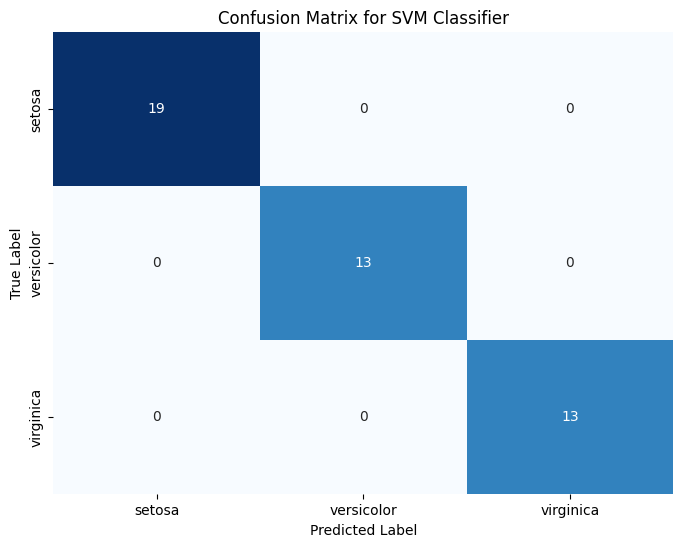

In [8]:
# 23.	Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn


# 1. Load a sample dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names # Get class names for better visualization

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train an SVM Classifier
svm_model = SVC(kernel='linear', random_state=42) # Using a linear kernel for simplicity
svm_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = svm_model.predict(X_test)

# 5. Evaluate the model and generate the Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)

# 6. Visualize the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


Mean Absolute Error (MAE): 0.3589


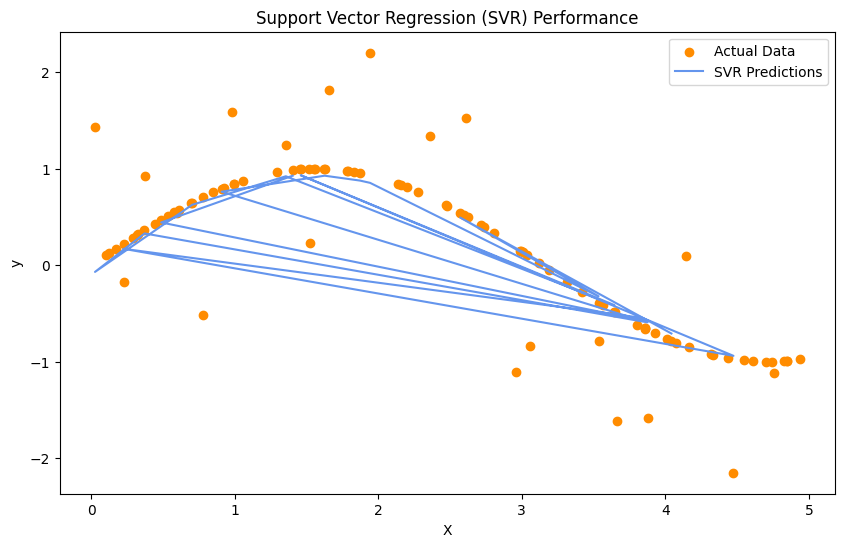

In [32]:
# 24.	Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE


# 1. Generate synthetic data (replace with your actual data)
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
# Add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(20))

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y_train and y_test for scaling
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped).ravel()
y_test_scaled = scaler_y.transform(y_test_reshaped).ravel()

# 4. Initialize and train the SVR model
# You can experiment with different kernels (e.g., 'linear', 'poly', 'rbf') and hyperparameters
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# 5. Make predictions on the scaled test set
y_pred_scaled = svr_model.predict(X_test_scaled)

# 6. Inverse transform the predictions to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 7. Evaluate the model performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Visualize the results (for simple 1D data)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Actual Data')
plt.plot(X_test, y_pred, color='cornflowerblue', label='SVR Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression (SVR) Performance')
plt.legend()
plt.show()



ROC-AUC Score: 0.9876


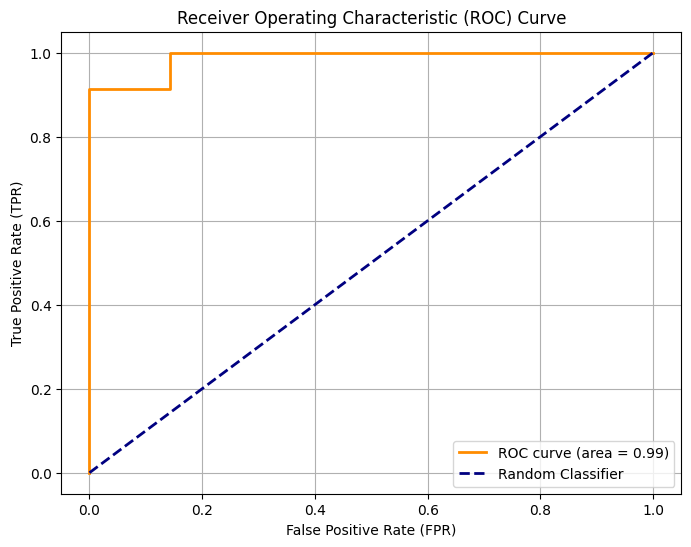

In [10]:
# 25.	Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score


# 1. Generate synthetic data for demonstration
# In a real-world scenario, you would load your own dataset here.
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = (X[:, 0] + X[:, 1] > 1.0).astype(int)  # Simple binary target based on feature sum

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the Naïve Bayes classifier
# GaussianNB is suitable for continuous data. For categorical data, use MultinomialNB or BernoulliNB.
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# 4. Predict probabilities on the test set for ROC-AUC calculation
# We need probabilities of the positive class (class 1)
y_pred_proba = naive_bayes_model.predict_proba(X_test)[:, 1]

# 5. Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6. Plot the ROC curve (optional but recommended for visualization)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


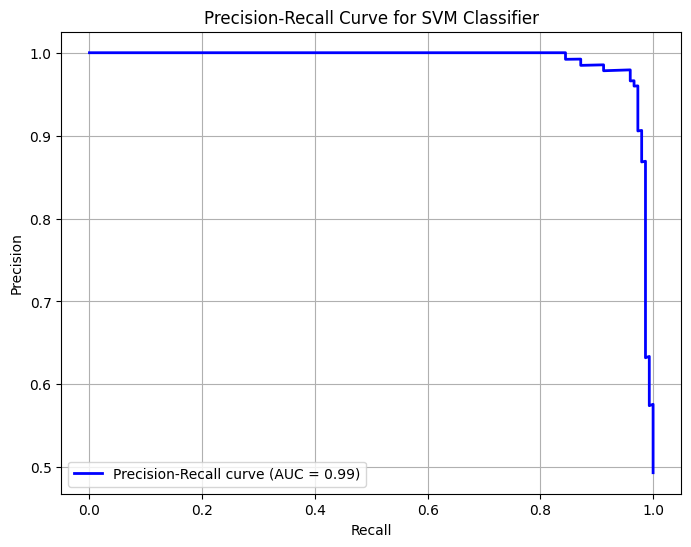

In [13]:
# 26.	Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.


# 1. Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_clusters_per_class=1, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train an SVM Classifier
# Using probability=True is necessary to get probability estimates for precision_recall_curve
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# 4. Get probability estimates for the positive class
y_scores = svm_classifier.predict_proba(X_test)[:, 1]

# 5. Compute Precision-Recall pairs and AUC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# 6. Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2,
         label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
